<a href="https://colab.research.google.com/github/jaysonDProgrammer/Car-Modifying-/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jayson De Ada Fernandez 07470190**
# Assignment 2
https://colab.research.google.com/drive/1upTcFbPUje7YeEfZJtaXNPqu4j7aPjdI?usp=sharing

## **Importing and installing Libraries**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.regression.linear_model as smf
from matplotlib import style

from bokeh.layouts import row
from bokeh.io import output_notebook
from patsy import dmatrices
import xgboost as xgb



from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, SGDClassifier
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,  classification_report 

import warnings
warnings.filterwarnings('ignore')

output_notebook()
%matplotlib inline

In [14]:
!pip install matplotlib --upgrade

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.3.3)


In [15]:
! pip install seaborn --upgrade
! pip freeze > requirements.txt

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.1)


In [ ]:
!pip install pyngrok==4.1.1

### **Creating an White Wine APP using streamlit**

In [16]:
%%writefile app.py
# Main Panel
st.write("""
# Simple White Wine Prediction App
This app predicts the **Classification of White Wine if it's good, average or bad** type!
""")
#import libraries
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
#app heading
st.write("""
# Wine Quality Prediction App
This app predicts the ***Wine Quality*** type!
""")
#creating sidebar for user input features
st.sidebar.header('User Input Parameters')
  


# Wine Quality Prediction App
#This app predicts the ***Wine Quality*** type!""")
#creating sidebar for user input features
st.sidebar.header('User Input Parameters')
  
def user_input_features():
        fixed_acidity = st.sidebar.slider('fixed acidity', 4.6, 15.9, 8.31)
        volatile_acidity = st.sidebar.slider('volatile acidity', 0.12,1.58 , 0.52)
        citric_acid = st.sidebar.slider('citric acid', 0.0,1.0 , 0.5)
        residual_sugar = st.sidebar.slider('residual_sugar', 0.0, 10.0, 20.7)
        chlorides = st.sidebar.slider('chlorides', 0.01,0.6 , 0.08)
        free_sulfur_dioxide = st.sidebar.slider('free sulfur dioxide',1.0,30.0,50.5)
        total_sulfur_dioxide=st.sidebar.slider('total sulfur dioxide', 6.0,289.0 , 46.0)
        density = st.sidebar.slider('density', 0.1, 0.5, 1.0)
        pH = st.sidebar.slider ('pH', 1.0,2.0,3.5)
        sulphates=st.sidebar.slider('sulphates', 0.33,2.0,0.65 )
        alcohol=st.sidebar.slider('alcohol', 8.4,14.9, 10.4)
        data = {'fixed_acidity': fixed_acidity,
                'volatile_acidity': volatile_acidity,
                'citric_acid': citric_acid,
                'residual sugar': residual_sugar,
                'chlorides': chlorides,
                'free sulfur dioxide': free_sulfur_dioxide,
              'total_sulfur_dioxide':total_sulfur_dioxide,
              'density': density,
              'pH': pH,
              'sulphates':sulphates,
              'alcohol':alcohol}
        features = pd.DataFrame(data, index=[0])
        return features
df = user_input_features()

st.subheader('User Input parameters')
st.write(df)
#reading csv file
data=pd.read_csv('/content/drive/MyDrive/MachineLearning/winequality-white.csv', delimiter=';')
X =np.array(data[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]])
Y = np.array(data['quality'])

rfc= RandomForestClassifier()
rfc.fit(x_train, y_train)
st.subheader('Wine quality labels and their corresponding index number')
st.write(pd.DataFrame({
   'wine quality': [3, 4, 5, 6, 7, 8 ]}))

prediction = rfc.predict(df)
prediction_proba = rfc.predict_proba(df)
st.subheader('Prediction')
st.write(prediction)

st.subheader('Prediction Probability')

Overwriting app.py


In [17]:
!ls

app.py	drive  requirements.txt  sample_data


In [18]:
! ngrok authtoken 1jeVd279Ct4MOa6hUnculEIqEGc_6YCC8y6Peq6YbGDNjqDxw

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [19]:
from pyngrok import ngrok

In [20]:
!streamlit run app.py&>/dev/null&

In [21]:
!pgrep streamlit

1527
1536
1638
1717
1770
1840
1925
1994
2011
2037
2118
2204
2302


In [22]:
publ_url = ngrok.connect(port ='8501')

In [23]:
publ_url

<NgrokTunnel: "http://d31063f0380d.ngrok.io" -> "http://localhost:80">

## **Read Data**

In [24]:
winedata = pd.read_csv('/content/drive/MyDrive/MachineLearning/winequality-white.csv', delimiter=';')
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## **Checking Null value**

In [25]:

winedata.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [26]:
print("Shape of the dataset: ", winedata.shape)
print('\n')
winedata.columns

Shape of the dataset:  (4898, 12)




Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [27]:
winedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## **Stastical information**

In [28]:
winedata.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [29]:
winedata.quality.value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

## <b>Quality graph with other attributes 

[Text(0.5, 0, 'Wine Quality'),
 Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 1.0, 'Alcohol percent in different wine quality types')]

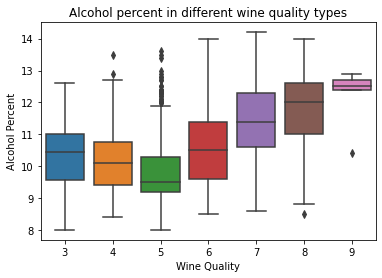

In [30]:
bx = sns.boxplot(x="quality", y='alcohol', data = winedata)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

<AxesSubplot:>

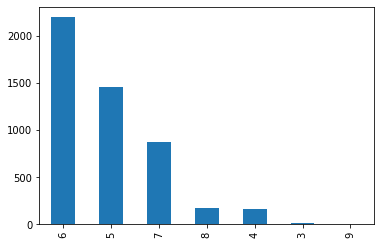

In [31]:
winedata['quality'].value_counts().head(100).plot.bar()

<AxesSubplot:xlabel='quality', ylabel='count'>

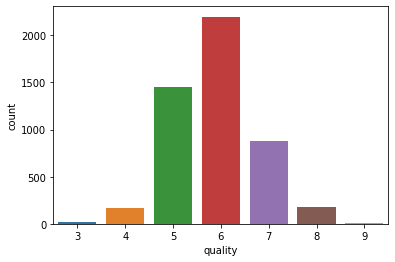

In [32]:
sns.countplot(x='quality', data=winedata)

## <b> Correlation between different features using corelation map 

<AxesSubplot:>

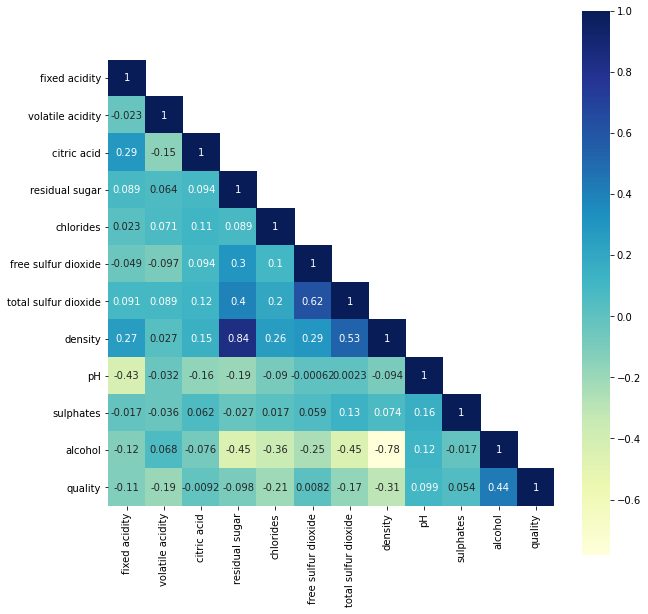

In [33]:
correlation= winedata.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap="YlGnBu")

[Text(0.5, 0, 'Wine Ratings'),
 Text(0, 0.5, 'pH'),
 Text(0.5, 1.0, 'pH in different types of Wine ratings')]

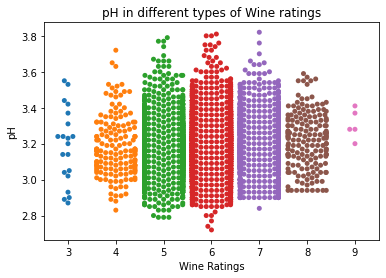

In [34]:
bx = sns.swarmplot(x="quality", y="pH", data = winedata);
bx.set(xlabel='Wine Ratings', ylabel='pH', title='pH in different types of Wine ratings')

In [35]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

## **Gather training and testing data**

In [36]:
# Since the numbers 3-9 don't really mean much, I map these to low(0), average(1), and high(2)
bins = [0, 5.5, 7.5, 10] # this means 3-5 are low, 6-7 are average, and 8-9 are high
#the quality is now 0,1, or 2
labels = [0, 1, 2]
winedata['quality'] = pd.cut(winedata['quality'], bins=bins, labels=labels)

In [37]:
winedata.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [38]:
x = winedata[winedata.columns[:-1]]
y = winedata['quality']
sc = StandardScaler()
x = sc.fit_transform(x)
#produce my training and testing variables
#We're getting 80% of data and then the remaining 20% is our testing data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [39]:
for datas in [y_train, y_test]:
    print(datas.describe())

count     3918
unique       3
top          1
freq      2454
Name: quality, dtype: int64
count     980
unique      3
top         1
freq      624
Name: quality, dtype: int64


## **K Nearest Neighbors Classifier**

In [40]:
KN3 = KNeighborsClassifier(n_neighbors = 3)
KN3.fit(x_train, y_train)
pred_KN3 = KN3.predict(x_test)
print(classification_report(y_test, pred_KN3))
cross_val = cross_val_score(estimator=KN3, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       321
           1       0.77      0.79      0.78       624
           2       0.39      0.26      0.31        35

    accuracy                           0.72       980
   macro avg       0.60      0.56      0.57       980
weighted avg       0.71      0.72      0.71       980

0.7292016806722689


In [41]:
KN5 = KNeighborsClassifier(n_neighbors = 5)
KN5.fit(x_train, y_train)
pred_KN5 = KN5.predict(x_test)
print(classification_report(y_test, pred_KN5))
cross_val = cross_val_score(estimator=KN5, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.64      0.59      0.62       321
           1       0.76      0.82      0.79       624
           2       0.33      0.11      0.17        35

    accuracy                           0.72       980
   macro avg       0.58      0.51      0.52       980
weighted avg       0.71      0.72      0.71       980

0.7225618508272874


## **Random Forest Classifier**

In [42]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))
cross_val = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       321
           1       0.83      0.89      0.86       624
           2       0.93      0.40      0.56        35

    accuracy                           0.82       980
   macro avg       0.85      0.67      0.72       980
weighted avg       0.82      0.82      0.81       980

0.8070384675609373


## **Decision Tree Classifier**

In [43]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
pred_DT = DT.predict(x_test)
print(classification_report(y_test, pred_DT))
cross_val = cross_val_score(estimator=DT, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       321
           1       0.81      0.78      0.80       624
           2       0.35      0.49      0.41        35

    accuracy                           0.74       980
   macro avg       0.61      0.65      0.62       980
weighted avg       0.74      0.74      0.74       980

0.7422125371887887


## **Stochastic Gradient**

In [44]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)
print(classification_report(y_test, pred_sgd))
cross_val = cross_val_score(estimator=sgd, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.65      0.37      0.47       321
           1       0.70      0.90      0.79       624
           2       0.00      0.00      0.00        35

    accuracy                           0.69       980
   macro avg       0.45      0.42      0.42       980
weighted avg       0.66      0.69      0.66       980

0.6977986846912678


## **AdaBoost Classifier**

In [45]:

from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3))
cross_val = cross_val_score(estimator=sgd, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.62      0.54      0.58       321
           1       0.74      0.83      0.78       624
           2       0.33      0.06      0.10        35

    accuracy                           0.71       980
   macro avg       0.57      0.47      0.49       980
weighted avg       0.69      0.71      0.69       980

0.7031584372879587


## **Gradient Boosting**

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
print(classification_report(y_test, y_pred4))
cross_val = cross_val_score(estimator=sgd, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.69      0.61      0.65       321
           1       0.78      0.86      0.82       624
           2       0.75      0.17      0.28        35

    accuracy                           0.75       980
   macro avg       0.74      0.55      0.58       980
weighted avg       0.75      0.75      0.74       980

0.7024061798632497


## **XGBOOST**

              precision    recall  f1-score   support

           0       0.65      0.57      0.61       321
           1       0.76      0.84      0.80       624
           2       1.00      0.06      0.11        35

    accuracy                           0.73       980
   macro avg       0.80      0.49      0.50       980
weighted avg       0.73      0.73      0.71       980

0.6990761522000105


[Text(0.5, 1.0, 'Confusion Matrix'),
 Text(0.5, 15.0, 'True Label'),
 Text(33.0, 0.5, 'Predicted Label')]

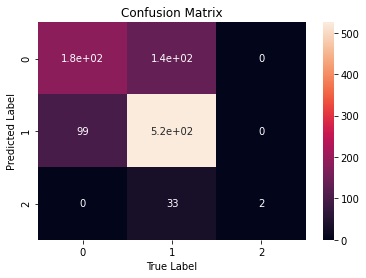

In [47]:

model5 = xgb.XGBClassifier(random_state=1)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
print(classification_report(y_test, y_pred5))
cross_val = cross_val_score(estimator=sgd, X=x_train, y=y_train, cv=10)
print(cross_val.mean())
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test, y_pred5), annot=True)
ax.set(title="Confusion Matrix",
  xlabel="True Label",
  ylabel="Predicted Label")

## **NEURAL NETWORK**

In [48]:

from sklearn.neural_network import MLPClassifier
NeuralClf =  MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes =(5,2), random_state =1)
NeuralClf.fit(x_train, y_train)
NeuralY_Pred = NeuralClf.predict(x_test)

#CONFUSION MATRIX and CLASSIFICATION REPORT
from sklearn.metrics import classification_report, confusion_matrix
print("The confusion_matrix is:\n")
print(confusion_matrix(y_test, NeuralY_Pred))
print("\nThe classification_report is:\n")
print(classification_report(y_test, NeuralY_Pred))


The confusion_matrix is:

[[187 134   0]
 [ 92 532   0]
 [  0  35   0]]

The classification_report is:

              precision    recall  f1-score   support

           0       0.67      0.58      0.62       321
           1       0.76      0.85      0.80       624
           2       0.00      0.00      0.00        35

    accuracy                           0.73       980
   macro avg       0.48      0.48      0.48       980
weighted avg       0.70      0.73      0.72       980



## **Using PyTorch**

In [49]:
input_cols = list(winedata.columns)[:-1]
input_cols
output_cols = ['quality']

In [50]:
def dataframe_to_arrays(winedata):
    # Make a copy of the original dataframe
    df1 = winedata.copy(deep=True)
    # Extract input & outputs as numpy arrays
    inputs_array = df1[input_cols].to_numpy()
    targets_array = df1[output_cols].to_numpy()
    return inputs_array, targets_array

In [51]:
inputs_array, targets_array = dataframe_to_arrays(winedata)
inputs_array, targets_array

(array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
        [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
        [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
        ...,
        [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
        [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
        [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]]), array([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]))

In [52]:
inputs_array.shape,targets_array.shape

((4898, 11), (4898, 1))

In [53]:
import torch
inputs = torch.Tensor(inputs_array)
targets = torch.Tensor(targets_array)

In [54]:
from torch.utils.data import DataLoader, TensorDataset, random_split
dataset = TensorDataset(inputs, targets)

In [55]:
winedata.shape

(4898, 12)

In [56]:
num_rows = len(winedata)
val_percent = 0.01 # between 0.1 and 0.2
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size


train_df, val_df = random_split(dataset, [train_size, val_size]) 

In [57]:
batch_size = 50

In [58]:
train_loader = DataLoader(train_df, batch_size, shuffle=True)
val_loader = DataLoader(val_df, batch_size)

In [59]:
input_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [60]:
output_cols

['quality']

In [61]:
input_size = len(input_cols)
output_size = len(output_cols)

In [62]:
import torch.nn as nn
class WineModel(nn.Module):
    def __init__(self):
        super().__init__()     
        self.linear = nn.Linear(input_size, output_size) # fill this (hint: use input_size & output_size defined above)
        #model initialized with random weight
        
    def forward(self, xb):
        out = self.linear(xb)             # batch wise forwarding
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)         
        # Calcuate loss
        loss = F.l1_loss(out, targets)  # batch wise training step and loss
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss =F.l1_loss(out, targets)       # batch wise validation and loss    
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine val losses of all batches as average
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [63]:
model =  WineModel()

In [64]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.2901,  0.0568, -0.1604,  0.2332, -0.1675, -0.2675, -0.1102, -0.2928,
          -0.0283,  0.0970,  0.0630]], requires_grad=True),
 Parameter containing:
 tensor([-0.2052], requires_grad=True)]

In [65]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)  #appends total validation loss of whole validation set epoch wise
    return history

In [66]:
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets.utils import download_url

In [67]:
result = evaluate(model,val_loader) # Use the evaluate function
print(result)

{'val_loss': 24.50423240661621}


In [68]:
epochs = 1000
lr = 1e-2
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 102.3940
Epoch [40], val_loss: 111.7580
Epoch [60], val_loss: 124.9683
Epoch [80], val_loss: 28.7709
Epoch [100], val_loss: 128.0801
Epoch [120], val_loss: 78.0920
Epoch [140], val_loss: 132.2443
Epoch [160], val_loss: 51.7254
Epoch [180], val_loss: 156.9668
Epoch [200], val_loss: 40.2789
Epoch [220], val_loss: 119.1885
Epoch [240], val_loss: 80.5525
Epoch [260], val_loss: 12.5942
Epoch [280], val_loss: 56.0067
Epoch [300], val_loss: 127.8657
Epoch [320], val_loss: 134.7210
Epoch [340], val_loss: 132.3527
Epoch [360], val_loss: 171.4418
Epoch [380], val_loss: 96.0085
Epoch [400], val_loss: 148.5133
Epoch [420], val_loss: 82.6548
Epoch [440], val_loss: 108.4161
Epoch [460], val_loss: 102.1278
Epoch [480], val_loss: 46.3966
Epoch [500], val_loss: 29.0004
Epoch [520], val_loss: 51.9201
Epoch [540], val_loss: 80.0498
Epoch [560], val_loss: 80.4835
Epoch [580], val_loss: 121.3336
Epoch [600], val_loss: 106.5976
Epoch [620], val_loss: 145.7742
Epoch [640], val_loss: 120

In [69]:
epochs = 1000
lr = 1e-3
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 14.1360
Epoch [40], val_loss: 8.3540
Epoch [60], val_loss: 13.2206
Epoch [80], val_loss: 7.5467
Epoch [100], val_loss: 4.5910
Epoch [120], val_loss: 8.2946
Epoch [140], val_loss: 10.5348
Epoch [160], val_loss: 10.5150
Epoch [180], val_loss: 3.5227
Epoch [200], val_loss: 4.4155
Epoch [220], val_loss: 12.4631
Epoch [240], val_loss: 2.1352
Epoch [260], val_loss: 3.6829
Epoch [280], val_loss: 4.5079
Epoch [300], val_loss: 12.9502
Epoch [320], val_loss: 2.5861
Epoch [340], val_loss: 1.3621
Epoch [360], val_loss: 6.9408
Epoch [380], val_loss: 3.6744
Epoch [400], val_loss: 16.6375
Epoch [420], val_loss: 9.8731
Epoch [440], val_loss: 17.5040
Epoch [460], val_loss: 4.9874
Epoch [480], val_loss: 5.8862
Epoch [500], val_loss: 16.4257
Epoch [520], val_loss: 13.5912
Epoch [540], val_loss: 10.7277
Epoch [560], val_loss: 6.8191
Epoch [580], val_loss: 15.4446
Epoch [600], val_loss: 7.1794
Epoch [620], val_loss: 9.9686
Epoch [640], val_loss: 2.7427
Epoch [660], val_loss: 4.5980
Ep

In [70]:
epochs = 1000
lr = 1e-4
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 0.7509
Epoch [40], val_loss: 0.8987
Epoch [60], val_loss: 0.8018
Epoch [80], val_loss: 0.6655
Epoch [100], val_loss: 1.0972
Epoch [120], val_loss: 1.1728
Epoch [140], val_loss: 1.1127
Epoch [160], val_loss: 1.2823
Epoch [180], val_loss: 1.0677
Epoch [200], val_loss: 1.0201
Epoch [220], val_loss: 0.7690
Epoch [240], val_loss: 0.9119
Epoch [260], val_loss: 1.0284
Epoch [280], val_loss: 1.0374
Epoch [300], val_loss: 0.9536
Epoch [320], val_loss: 1.2424
Epoch [340], val_loss: 0.9134
Epoch [360], val_loss: 0.7324
Epoch [380], val_loss: 0.6037
Epoch [400], val_loss: 1.1273
Epoch [420], val_loss: 0.7585
Epoch [440], val_loss: 1.0058
Epoch [460], val_loss: 0.9636
Epoch [480], val_loss: 0.6743
Epoch [500], val_loss: 1.0059
Epoch [520], val_loss: 1.2532
Epoch [540], val_loss: 1.0544
Epoch [560], val_loss: 0.8460
Epoch [580], val_loss: 0.9633
Epoch [600], val_loss: 1.1603
Epoch [620], val_loss: 0.9710
Epoch [640], val_loss: 0.8376
Epoch [660], val_loss: 1.0674
Epoch [680], v

In [71]:
epochs = 1000
lr = 1e-6
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 0.4017
Epoch [40], val_loss: 0.3991
Epoch [60], val_loss: 0.3971
Epoch [80], val_loss: 0.3956
Epoch [100], val_loss: 0.3947
Epoch [120], val_loss: 0.3953
Epoch [140], val_loss: 0.3921
Epoch [160], val_loss: 0.3926
Epoch [180], val_loss: 0.3935
Epoch [200], val_loss: 0.3917
Epoch [220], val_loss: 0.3917
Epoch [240], val_loss: 0.3910
Epoch [260], val_loss: 0.3888
Epoch [280], val_loss: 0.3903
Epoch [300], val_loss: 0.3899
Epoch [320], val_loss: 0.3901
Epoch [340], val_loss: 0.3882
Epoch [360], val_loss: 0.3896
Epoch [380], val_loss: 0.3866
Epoch [400], val_loss: 0.3895
Epoch [420], val_loss: 0.3878
Epoch [440], val_loss: 0.3873
Epoch [460], val_loss: 0.3878
Epoch [480], val_loss: 0.3894
Epoch [500], val_loss: 0.3874
Epoch [520], val_loss: 0.3885
Epoch [540], val_loss: 0.3881
Epoch [560], val_loss: 0.3887
Epoch [580], val_loss: 0.3879
Epoch [600], val_loss: 0.3870
Epoch [620], val_loss: 0.3862
Epoch [640], val_loss: 0.3843
Epoch [660], val_loss: 0.3856
Epoch [680], v

In [72]:
val_loss = evaluate(model,val_loader)
val_loss

{'val_loss': 0.3866051137447357}

In [73]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0) 
    predictions = model(inputs)
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [74]:
input, target = val_df[0]
predict_single(input, target, model)

Input: tensor([  6.6000,   0.4100,   0.2700,  10.7000,   0.1100,  20.0000, 103.0000,
          0.9967,   3.0800,   0.4100,   9.0000])
Target: tensor([1.])
Prediction: tensor([0.5558])


In [75]:
input, target = val_df[10]
predict_single(input, target, model)

Input: tensor([6.4000e+00, 2.2000e-01, 3.8000e-01, 9.1000e+00, 4.4000e-02, 3.5000e+01,
        1.2700e+02, 9.9326e-01, 2.9700e+00, 3.0000e-01, 1.1000e+01])
Target: tensor([1.])
Prediction: tensor([0.9541])


In [76]:
input, target = val_df[5]
predict_single(input, target, model)

Input: tensor([6.0000e+00, 1.8000e-01, 2.7000e-01, 1.5000e+00, 8.9000e-02, 4.0000e+01,
        1.4300e+02, 9.9230e-01, 3.4900e+00, 6.2000e-01, 1.0800e+01])
Target: tensor([1.])
Prediction: tensor([0.8153])


In [77]:
#Accuracy 
Accuracy = [ ]

classifiers=[KNeighborsClassifier(),RandomForestClassifier(random_state=41),
             DecisionTreeClassifier(random_state=42),SGDClassifier(),AdaBoostClassifier(random_state=1),
             GradientBoostingClassifier(random_state=1),xgb.XGBClassifier(random_state=1), MLPClassifier(random_state =1)]
classifiers_names=['KNearestNeighbors','RandomForestClassifier','DecisionTree', 'Stochastic Gradient', 'Adaboost Classifier',
                   'Gradient Boosting', 'XGBoost', 'Neural Network']

result={}

for classifier  in range(len(classifiers)):
    c=classifiers[classifier]
    c.fit(x_train,y_train)
    y_predict=c.predict(x_test)
    Accuracy.append(accuracy_score(y_predict,y_test))
     
result={'Classifiers Algorithm':classifiers_names,'Accuracy':Accuracy}

Accuracy_frame=pd.DataFrame(result)
Accuracy_frame

,Classifiers Algorithm,Accuracy
0,KNearestNeighbors,0.719388
1,RandomForestClassifier,0.822449
2,DecisionTree,0.743878
3,Stochastic Gradient,0.684694
4,Adaboost Classifier,0.705102
5,Gradient Boosting,0.753061
6,XGBoost,0.725510
7,Neural Network,0.753061


## **Showing the graph of the accuracy of different classifier**

<AxesSubplot:xlabel='Accuracy', ylabel='Classifiers Algorithm'>

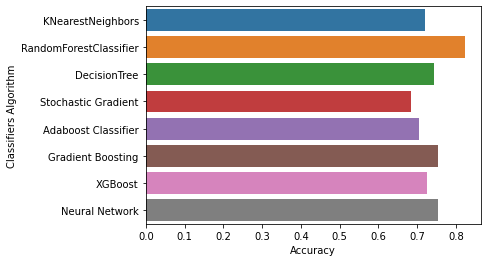

In [78]:
#we can see that RandomForestClassifier has the highest accuracy of 82$
sns.barplot(y='Classifiers Algorithm',x='Accuracy',data=Accuracy_frame)

## **Using RandomizedSearchCV to improve the results**

In [ ]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]
# number of features to consider at every split
max_features = ['auto', 'sqrt']
# max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]
# min number of samples required to split a node
min_samples_split = [2, 5, 10]
# min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# method of selecting samples for training each tree
bootstrap = [True, False]

# random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

rf_optimized = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42)



rf_optimized.fit(x_train, y_train)
pred_optimized = rf_optimized.predict(x_test)
print(classification_report(y_test, pred_optimized))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   4.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   4.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   4.5s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True, total=   3.1s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True, total=   3.1s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_sa

t=2021-01-16T20:15:06+0000 lvl=warn msg="failed to open private leg" id=591c6315ae79 privaddr=localhost:80 err="dial tcp 127.0.0.1:80: connect: connection refused"
t=2021-01-16T20:15:06+0000 lvl=warn msg="failed to open private leg" id=368d245bbe75 privaddr=localhost:80 err="dial tcp 127.0.0.1:80: connect: connection refused"


[CV]  n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=True, total=   4.2s
[CV] n_estimators=366, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=76, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=76, bootstrap=False, total=   2.8s
[CV] n_estimators=366, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=76, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=76, bootstrap=False, total=   2.8s
[CV] n_estimators=366, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=76, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=76, bootstrap=False, total=   2.8s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=32, bootstrap=True 
[CV]  n_estimators=894, min_sa

## **shows our classification report**

In [ ]:

print(classification_report(y_test, pred_optimized))
print(rf_optimized.best_params_)

## **This classifier tells us that with an 80% of accuracy rate if our wine is good, average or bad**

In [ ]:
RFCeval = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
RFCeval.mean()

In [ ]:
rf_optimized = RandomForestClassifier(n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=None, bootstrap=True)
rf_optimized.fit(x_train, y_train)

RFCeval = cross_val_score(estimator=rf_optimized, X=x_train, y=y_train, cv=10)
RFCeval.mean()